In [63]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('../data/checking-logs.sqlite')

df = pd.io.sql.read_sql("SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'",
                            connection, parse_dates=['timestamp'])
df['date'] = df.timestamp.dt.date
df['hour'] = df.timestamp.dt.hour
df

,uid,timestamp,date,hour
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20


In [64]:

df['daytime'] = pd.cut(df.hour, bins=[-1, 3, 9, 16, 24], right=False, include_lowest=True, 
                        labels=['nigth', 'morning', 'afternoon', 'evening'])
df

,uid,timestamp,date,hour,daytime
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [65]:
df2 = df.groupby('daytime').date.value_counts().unstack(0)
df2.head()

daytime,nigth,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,33.0,35.0
2020-04-19,2.0,2.0,18.0,11.0
2020-04-20,NaN,NaN,12.0,13.0
2020-04-21,NaN,NaN,NaN,25.0


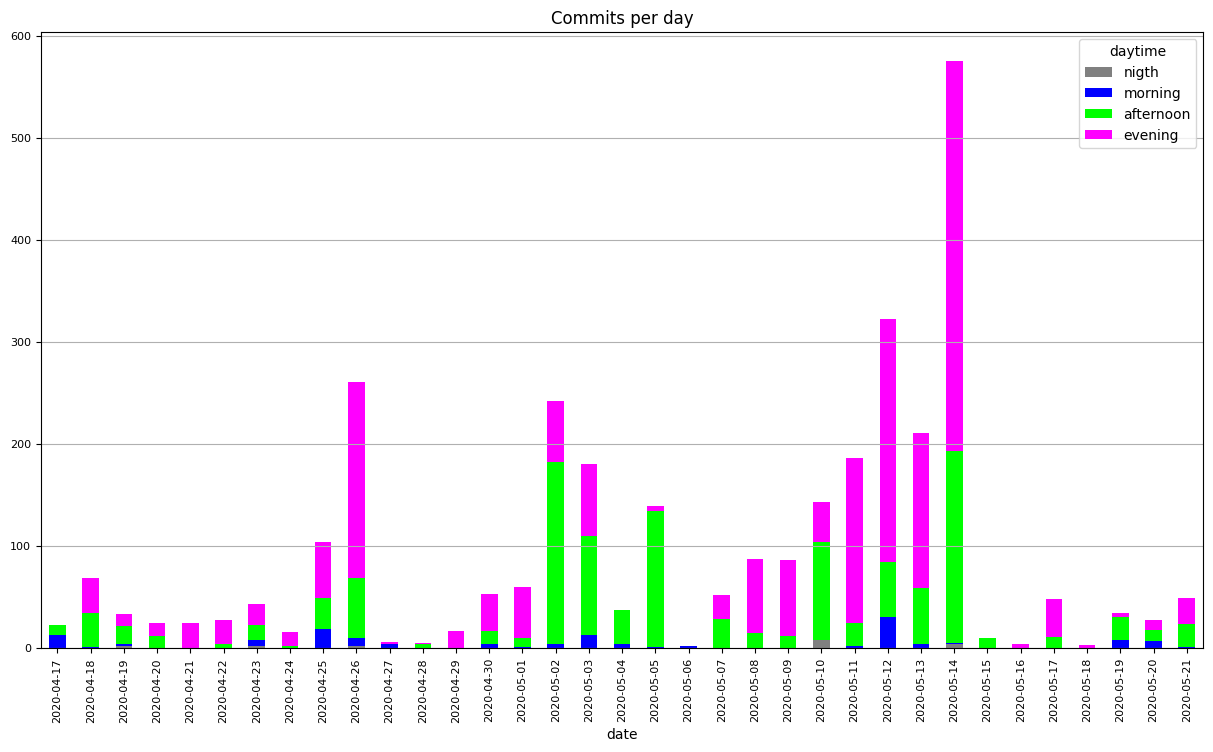

In [66]:
graph = df2.plot(kind='bar', fontsize=8, figsize=(15, 8), rot=90, title='Commits per day',
                    stacked=True, color=['gray', 'blue', 'lime', 'magenta'])
graph.grid(axis='y')

In [68]:
connection.close()

1. When do our users usually commit the labs: in the night, morning, afternoon,
or evening?
    Answer: afternoon, evening
2. Which day has:
∗ the most number of commits
∗ and at the same time, the number of commits in the evening is higher
than in the afternoon?
    Answer: 12.05.2020



